# Introduction

Personal Project by Arvin Assanny

### Description

We are using dataset from bigquery-public data which consist of adult income cencus, which we retrived using SQL query

```
SELECT age, workclass, education, education_num, marital_status, occupation, relationship, race, sex, capital_gain, capital_loss, hours_per_week, native_country, income_bracket
FROM `bigquery-public-data.ml_datasets.census_adult_income` 
WHERE workclass != ' ?'
 AND hours_per_week < 100
LIMIT 5994;
```

After retrieve the filtered dataset, we save it on .csv file then proceed to load it, in this notebook later on.

### Problem Statement
`Buatlah model Classification menggunakan Logistic Regression dan SVM untuk memprediksi income bracket menggunakan dataset yang sudah kalian simpan.`

## Import Libraries

We will import libraries which we will use on completing this assignment

In [1]:
# Install package feature-engine for handling outlier
! pip install feature-engine

In [2]:
# Install package phik for finding correlation
! pip install phik

We want to install those package first, now we proceed to import libraries we need.

In [3]:
# Data Loading
import pandas as pd
from pandas.api.types import CategoricalDtype

#Importing Warning filtering
import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from feature_engine.outliers import Winsorizer

# Feature Selection (manual)
import numpy as np

# Model Definition
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Model Inference
import joblib

# Calculate VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Loading

In [4]:
data = pd.read_csv('h8dsft_P1G2_Arvin_Assanny.csv')
data.head(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,27,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,>50K
1,47,Self-emp-not-inc,HS-grad,9,Married-AF-spouse,Craft-repair,Husband,White,Male,0,0,90,United-States,<=50K
2,29,Private,HS-grad,9,Married-AF-spouse,Transport-moving,Husband,White,Male,0,0,80,United-States,<=50K
3,26,Private,HS-grad,9,Married-AF-spouse,Sales,Husband,White,Male,0,0,55,United-States,<=50K
4,30,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Husband,White,Male,0,0,60,United-States,<=50K
5,35,Private,HS-grad,9,Married-AF-spouse,Other-service,Wife,White,Female,0,0,40,United-States,>50K
6,43,Private,HS-grad,9,Married-AF-spouse,Craft-repair,Wife,Black,Female,0,0,42,United-States,>50K
7,32,Private,HS-grad,9,Married-AF-spouse,Other-service,Other-relative,White,Female,0,0,10,United-States,<=50K
8,19,Private,HS-grad,9,Married-AF-spouse,Adm-clerical,Wife,White,Female,0,0,25,United-States,<=50K
9,38,Private,HS-grad,9,Married-AF-spouse,Other-service,Wife,White,Female,0,0,25,United-States,<=50K


In [5]:
data.tail(10)

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
5984,39,State-gov,Some-college,10,Separated,Exec-managerial,Unmarried,Black,Female,0,0,30,United-States,<=50K
5985,29,Private,Some-college,10,Separated,Priv-house-serv,Not-in-family,White,Female,0,0,30,Guatemala,<=50K
5986,25,Private,Some-college,10,Separated,Priv-house-serv,Other-relative,White,Female,0,0,30,El-Salvador,<=50K
5987,60,Private,Some-college,10,Separated,Transport-moving,Not-in-family,Amer-Indian-Eskimo,Female,0,0,30,United-States,<=50K
5988,48,Private,Some-college,10,Separated,Sales,Unmarried,Black,Female,0,0,35,United-States,<=50K
5989,26,Private,Some-college,10,Separated,Sales,Unmarried,White,Female,0,0,35,United-States,<=50K
5990,44,Private,Some-college,10,Separated,Sales,Other-relative,Black,Female,0,0,35,United-States,<=50K
5991,24,Private,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,35,United-States,<=50K
5992,47,Private,Some-college,10,Separated,Other-service,Not-in-family,Black,Female,0,0,35,United-States,<=50K
5993,29,Local-gov,Some-college,10,Separated,Adm-clerical,Unmarried,White,Female,0,0,38,United-States,<=50K


Here we show 10 first row and last 10 row of our data.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             5994 non-null   int64 
 1   workclass       5994 non-null   object
 2   education       5994 non-null   object
 3   education_num   5994 non-null   int64 
 4   marital_status  5994 non-null   object
 5   occupation      5994 non-null   object
 6   relationship    5994 non-null   object
 7   race            5994 non-null   object
 8   sex             5994 non-null   object
 9   capital_gain    5994 non-null   int64 
 10  capital_loss    5994 non-null   int64 
 11  hours_per_week  5994 non-null   int64 
 12  native_country  5994 non-null   object
 13  income_bracket  5994 non-null   object
dtypes: int64(5), object(9)
memory usage: 655.7+ KB


Here we can see that there is no missing value, but we want to check whether there is uncommon missing value.

In [7]:
#checking other common missing values
miss = {}

for i in list(data.columns):
    miss[i] = 0
    for a in data[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'age': 0,
 'workclass': 0,
 'education': 0,
 'education_num': 0,
 'marital_status': 0,
 'occupation': 1,
 'relationship': 0,
 'race': 0,
 'sex': 0,
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 0,
 'native_country': 76,
 'income_bracket': 0}

There are two columns (`occupation`, `native_country`) that has uncommon missing value, next we want to know what it is.

In [8]:
data.occupation.value_counts()

 Adm-clerical         1104
 Other-service         859
 Exec-managerial       779
 Prof-specialty        728
 Sales                 621
 Craft-repair          611
 Machine-op-inspct     412
 Transport-moving      244
 Handlers-cleaners     184
 Tech-support          179
 Farming-fishing       105
 Protective-serv       105
 Priv-house-serv        62
 ?                       1
Name: occupation, dtype: int64

We have one `?` entry on `occupation` column.

In [9]:
nan_o = data[(data['occupation']) == ' ?']
data.drop(index=nan_o.index, inplace=True)

We have drop the missing value from `occupation` column, now we will also check `native_country`

In [10]:
data.native_country.value_counts()

 United-States                 5521
 ?                               76
 Mexico                          58
 Germany                         35
 Puerto-Rico                     26
 Philippines                     24
 Cuba                            23
 England                         21
 Canada                          18
 Japan                           13
 El-Salvador                     12
 South                           12
 Columbia                        12
 Dominican-Republic              12
 Iran                            10
 Jamaica                         10
 Guatemala                       10
 Portugal                         9
 Italy                            9
 Haiti                            8
 Poland                           7
 Peru                             7
 France                           6
 India                            6
 China                            6
 Honduras                         5
 Nicaragua                        5
 Vietnam                    

We have 76 `?` entries on `native_country` column

We want to drop `?` entries on both column, since the total of these missing value is small compared to our total data.

In [11]:
nan_c = data[(data['native_country']) == ' ?']
data.drop(index=nan_c.index, inplace=True)

Here we already drop the missing value from `native_country` too. Now we want to make sure one more time.

In [12]:
#checking other common missing values
miss = {}

for i in list(data.columns):
    miss[i] = 0
    for a in data[i]:
        if a in ['N/A', '--', '-', 'Null', '?', ' ?', 'NaN', ' NaN']:
            miss[i] = miss[i] + 1
miss

{'age': 0,
 'workclass': 0,
 'education': 0,
 'education_num': 0,
 'marital_status': 0,
 'occupation': 0,
 'relationship': 0,
 'race': 0,
 'sex': 0,
 'capital_gain': 0,
 'capital_loss': 0,
 'hours_per_week': 0,
 'native_country': 0,
 'income_bracket': 0}

Here we have dropped all the missing values in our data, we also want to see if there is a duplicated data.

In [13]:
# Check duplicates
data.duplicated().sum()

223

We have so many duplicated data, we want to remove this because it might affect our model result.

In [14]:
dups = data[data.duplicated()]
dups

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
252,58,Private,HS-grad,9,Widowed,Sales,Not-in-family,White,Female,0,0,35,United-States,>50K
266,70,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,5,United-States,<=50K
399,62,Private,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,38,United-States,<=50K
438,55,Private,HS-grad,9,Widowed,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
457,45,Private,HS-grad,9,Widowed,Craft-repair,Not-in-family,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,32,Private,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
5550,41,Private,HS-grad,9,Separated,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
5580,31,Private,HS-grad,9,Separated,Other-service,Unmarried,Black,Female,0,0,40,United-States,<=50K
5625,46,Private,HS-grad,9,Separated,Machine-op-inspct,Own-child,Black,Female,0,0,40,United-States,<=50K


In [15]:
data.drop(dups.index, axis = 0, inplace=True)

Here we have dropped our duplicated data, next we want to make sure.

In [16]:
# Check duplicates
data.duplicated().any()

False

Now we don't have any duplicated data left, now we will do a reset index.

In [17]:
data.reset_index()
data.shape

(5694, 14)

Here we reset index to restart the index after we dropped some rows in our data.

Next we want to change our data type into some desireable ones.

In [18]:
# Assign into object
data[['workclass', 'marital_status', 'occupation', 
      'relationship', 'race', 'sex', 'native_country']].astype('object')

# Order education column and change into category data type
education_dtype = CategoricalDtype(categories=[' Preschool', ' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th', 
                                               ' HS-grad', ' Some-college', ' Assoc-voc', ' Assoc-acdm', ' Bachelors', ' Masters', ' Prof-school', ' Doctorate'], 
                                   ordered=True)
data['education'] = data['education'].astype(education_dtype)

# Change into category data type
data['education_num'] = data['education_num'].astype('category')

# Order income_bracket column and change into category data type
income_bracket_dtype = CategoricalDtype(categories=[' <=50K', ' >50K'], ordered=True)
data['income_bracket'] = data['income_bracket'].astype(income_bracket_dtype)

# delete the variable 
del education_dtype, income_bracket_dtype

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5694 entries, 0 to 5993
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             5694 non-null   int64   
 1   workclass       5694 non-null   object  
 2   education       5694 non-null   category
 3   education_num   5694 non-null   category
 4   marital_status  5694 non-null   object  
 5   occupation      5694 non-null   object  
 6   relationship    5694 non-null   object  
 7   race            5694 non-null   object  
 8   sex             5694 non-null   object  
 9   capital_gain    5694 non-null   int64   
 10  capital_loss    5694 non-null   int64   
 11  hours_per_week  5694 non-null   int64   
 12  native_country  5694 non-null   object  
 13  income_bracket  5694 non-null   category
dtypes: category(3), int64(4), object(7)
memory usage: 552.0+ KB


Here we have 4 numerical and 10 categorical data type, which we can assume that dtype 'object' is for nominal and dtype 'category' is for ordinal.

## Exploratory Data Analysis (EDA)

Now we want to explore our data to help us understand more, also help us to build our machine learning models.

### Explore Target Column

We want to explore more about `income_bracket` which will become our target column in this dataset.

In [20]:
print(f'Number of unique values in income_bracket column: {data.income_bracket.nunique()}')
print(f'Unique values in income_bracket column: {data.income_bracket.unique()}')

Number of unique values in income_bracket column: 2
Unique values in income_bracket column: [' >50K', ' <=50K']
Categories (2, object): [' <=50K' < ' >50K']


There are only 2 class on this target, the first one is income_bracker '>50K' and the second is '<=50K'.

Now we want to know how much data we have, grouped by income_bracket

In [21]:
data.income_bracket.value_counts()

 <=50K    5090
 >50K      604
Name: income_bracket, dtype: int64

We want to visualize this numbers to help us see more clearly

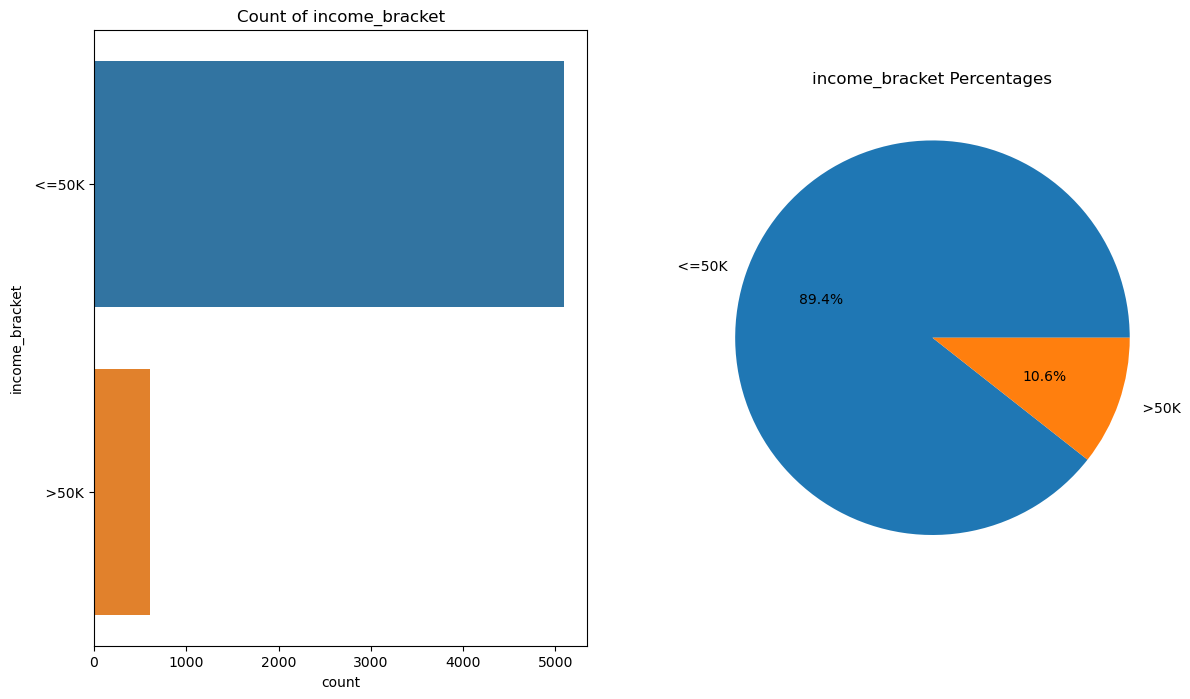

In [22]:
# Plot our target column
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
sns.countplot(y='income_bracket', data=data)
plt.title('Count of income_bracket')

plt.subplot(1, 2, 2)
plt.pie(data.groupby('income_bracket').size(), labels=data.groupby('income_bracket').size().index, autopct='%1.1f%%')
plt.title('income_bracket Percentages')
plt.show()

We know that our target data is imbalanced, with <=50K income bracket is more bigger.

### Find Numerical and Target Realtionship

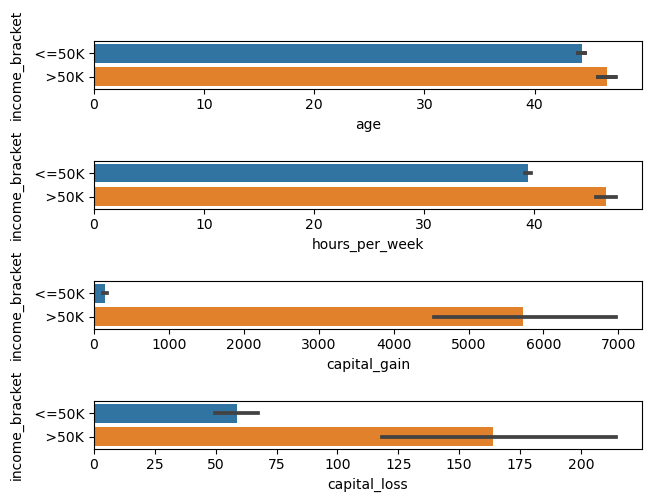

<Figure size 1500x1200 with 0 Axes>

In [23]:
fig, axes = plt.subplots(nrows=4,ncols=1, constrained_layout=True)
plt.figure(figsize=(15, 12))
sns.barplot(data=data, x="age", y="income_bracket", ax=axes[0])

for index, column in enumerate(['age', 'hours_per_week', 'capital_gain', 'capital_loss']):
    sns.barplot(data=data, x=column, y="income_bracket", ax=axes[index])

del fig, axes, index, column

Here we can see some relationship between target and numerical column. People included in income bracket of >50K has the higher values in every column.

#### Check distribution

We want to check data distribution on our numerical data.

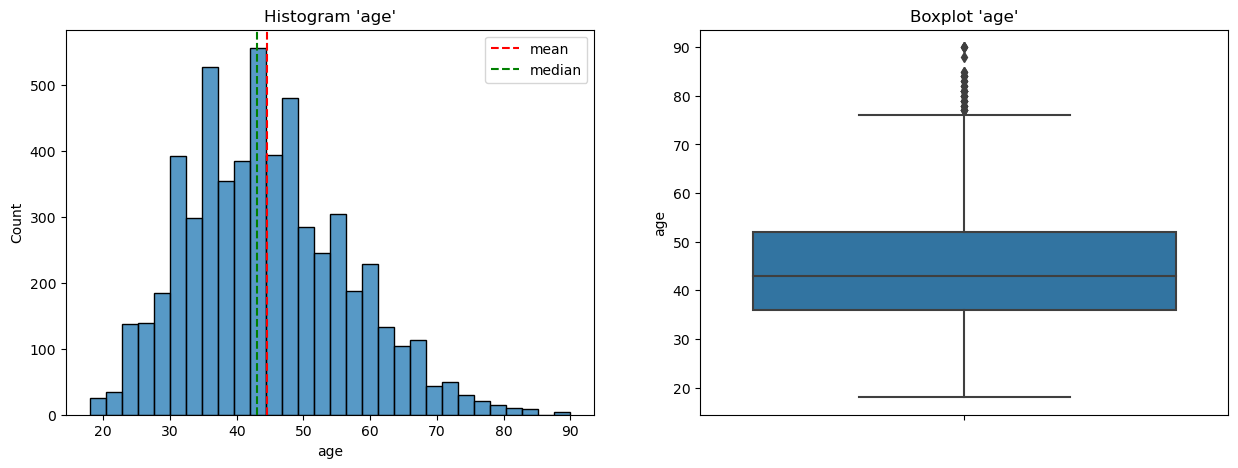

age Kurtosis: -0.031631998327759536
age Skewness: 0.468239293428324
Columns 'age' Normal Distribution


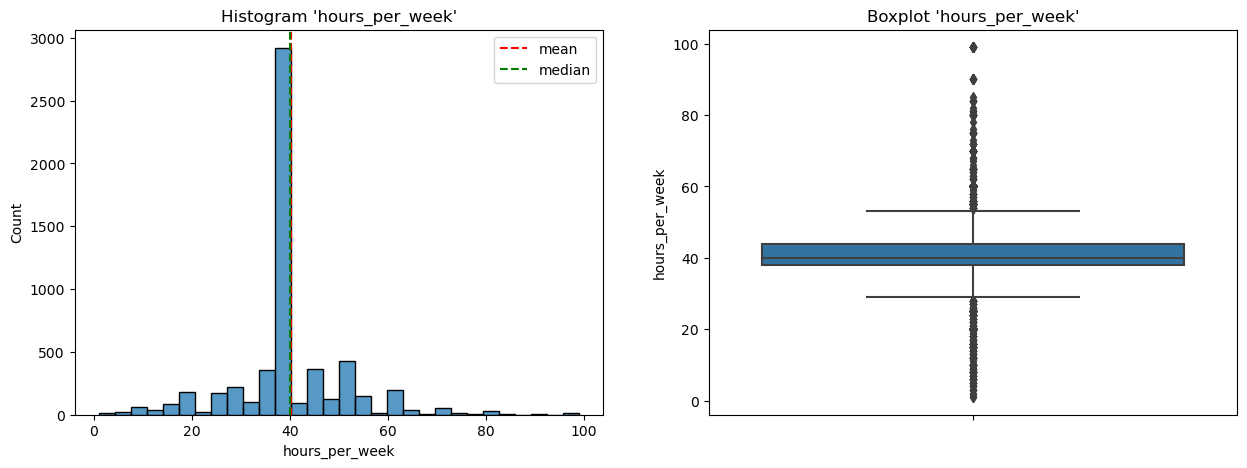

hours_per_week Kurtosis: 3.7408961078451113
hours_per_week Skewness: 0.36488606799053
Columns 'hours_per_week' Normal Distribution


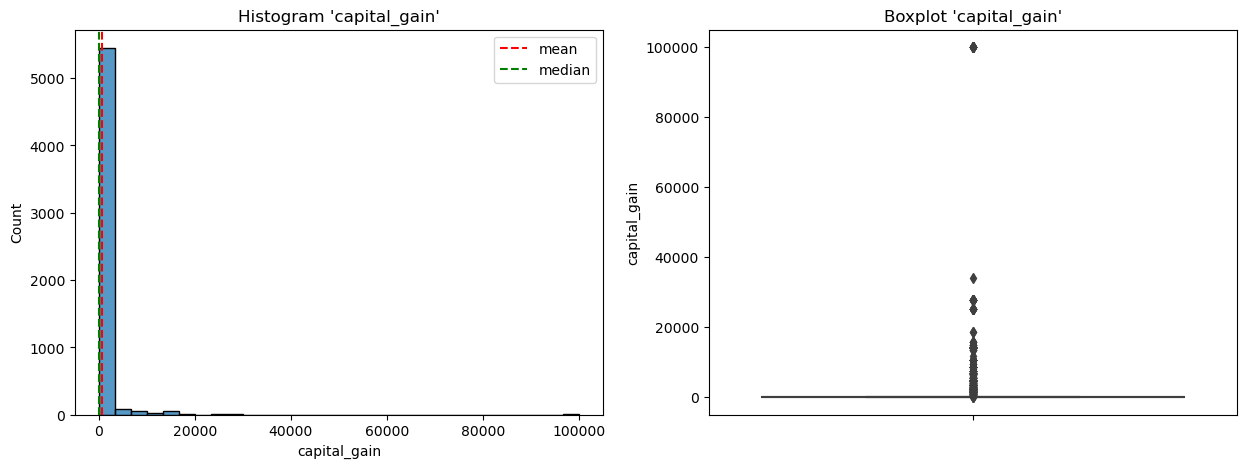

capital_gain Kurtosis: 248.41169817547677
capital_gain Skewness: 14.64440900253813
Columns 'capital_gain' Right Highly Skewed


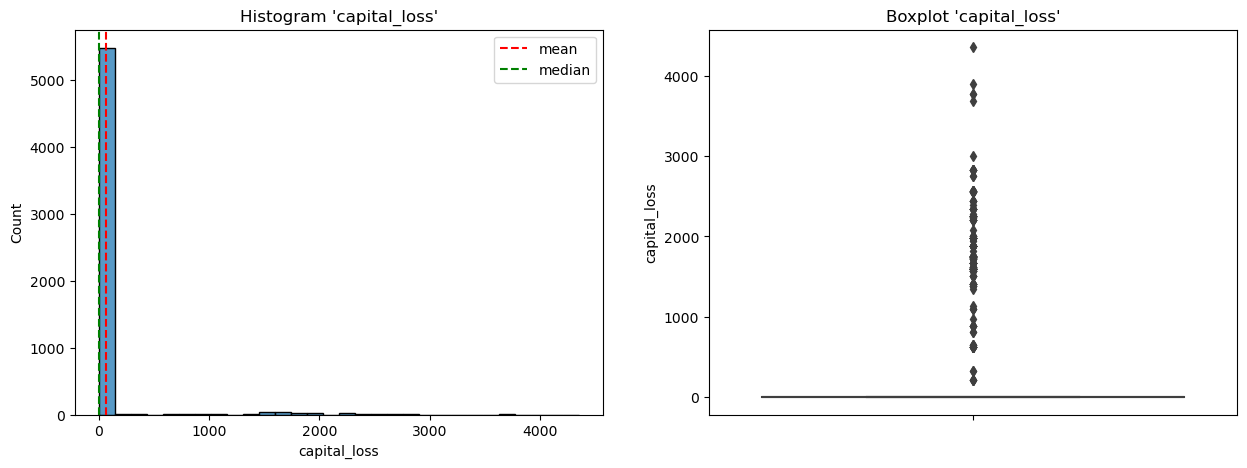

capital_loss Kurtosis: 33.85572502442492
capital_loss Skewness: 5.669635242231627
Columns 'capital_loss' Right Highly Skewed


In [24]:
def dist(df, col):
    fig, axes = plt.subplots(ncols = 2, figsize = (15, 5))
    
    # histogram
    sns.histplot(df[col],ax = axes[0], bins=30)
    axes[0].set_title(f"Histogram '{col}'")
    axes[0].axvline(df[col].mean(), color = 'red', linestyle = 'dashed', label = 'mean')
    axes[0].axvline(df[col].median(), color = 'green', linestyle = 'dashed', label = 'median')
    axes[0].legend()
    
    # boxplot
    sns.boxplot(y=df[col], ax =  axes[1])
    axes[1].set_title(f"Boxplot '{col}'")
    
    plt.show()
    
    # skewness
    print(df[col].name + ' Kurtosis: ' + str(df[col].kurt()))
    print(df[col].name + ' Skewness: ' + str(df[col].skew()))
    if -0.5 <= df[col].skew() <= 0.5:
        print("Columns '{}' Normal Distribution".format(col))
    elif df[col].skew() > 0.5 and df[col].skew() <= 1 :
        print("Columns '{}' Right Moderately Skewed".format(col))
    elif df[col].skew() > 1:
        print("Columns '{}' Right Highly Skewed".format(col))
    elif df[col].skew() < -0.5 and df[col].skew() >= -1 :
        print("Columns '{}' Left Moderately Skewed".format(col))
    elif df[col].skew() < -1:
        print("Columns '{}' Left Highly Skewed".format(col))

dnum = data[['age', 'hours_per_week', 'capital_gain', 'capital_loss']]

for col in dnum.columns:
    dist(data, col)

We can see that we have outliers in all our numerical data and also some skewed data distribution in capital_gain and capital_loss column.

### Find Categorical and Target Realtionship

Next we want to check categorical column

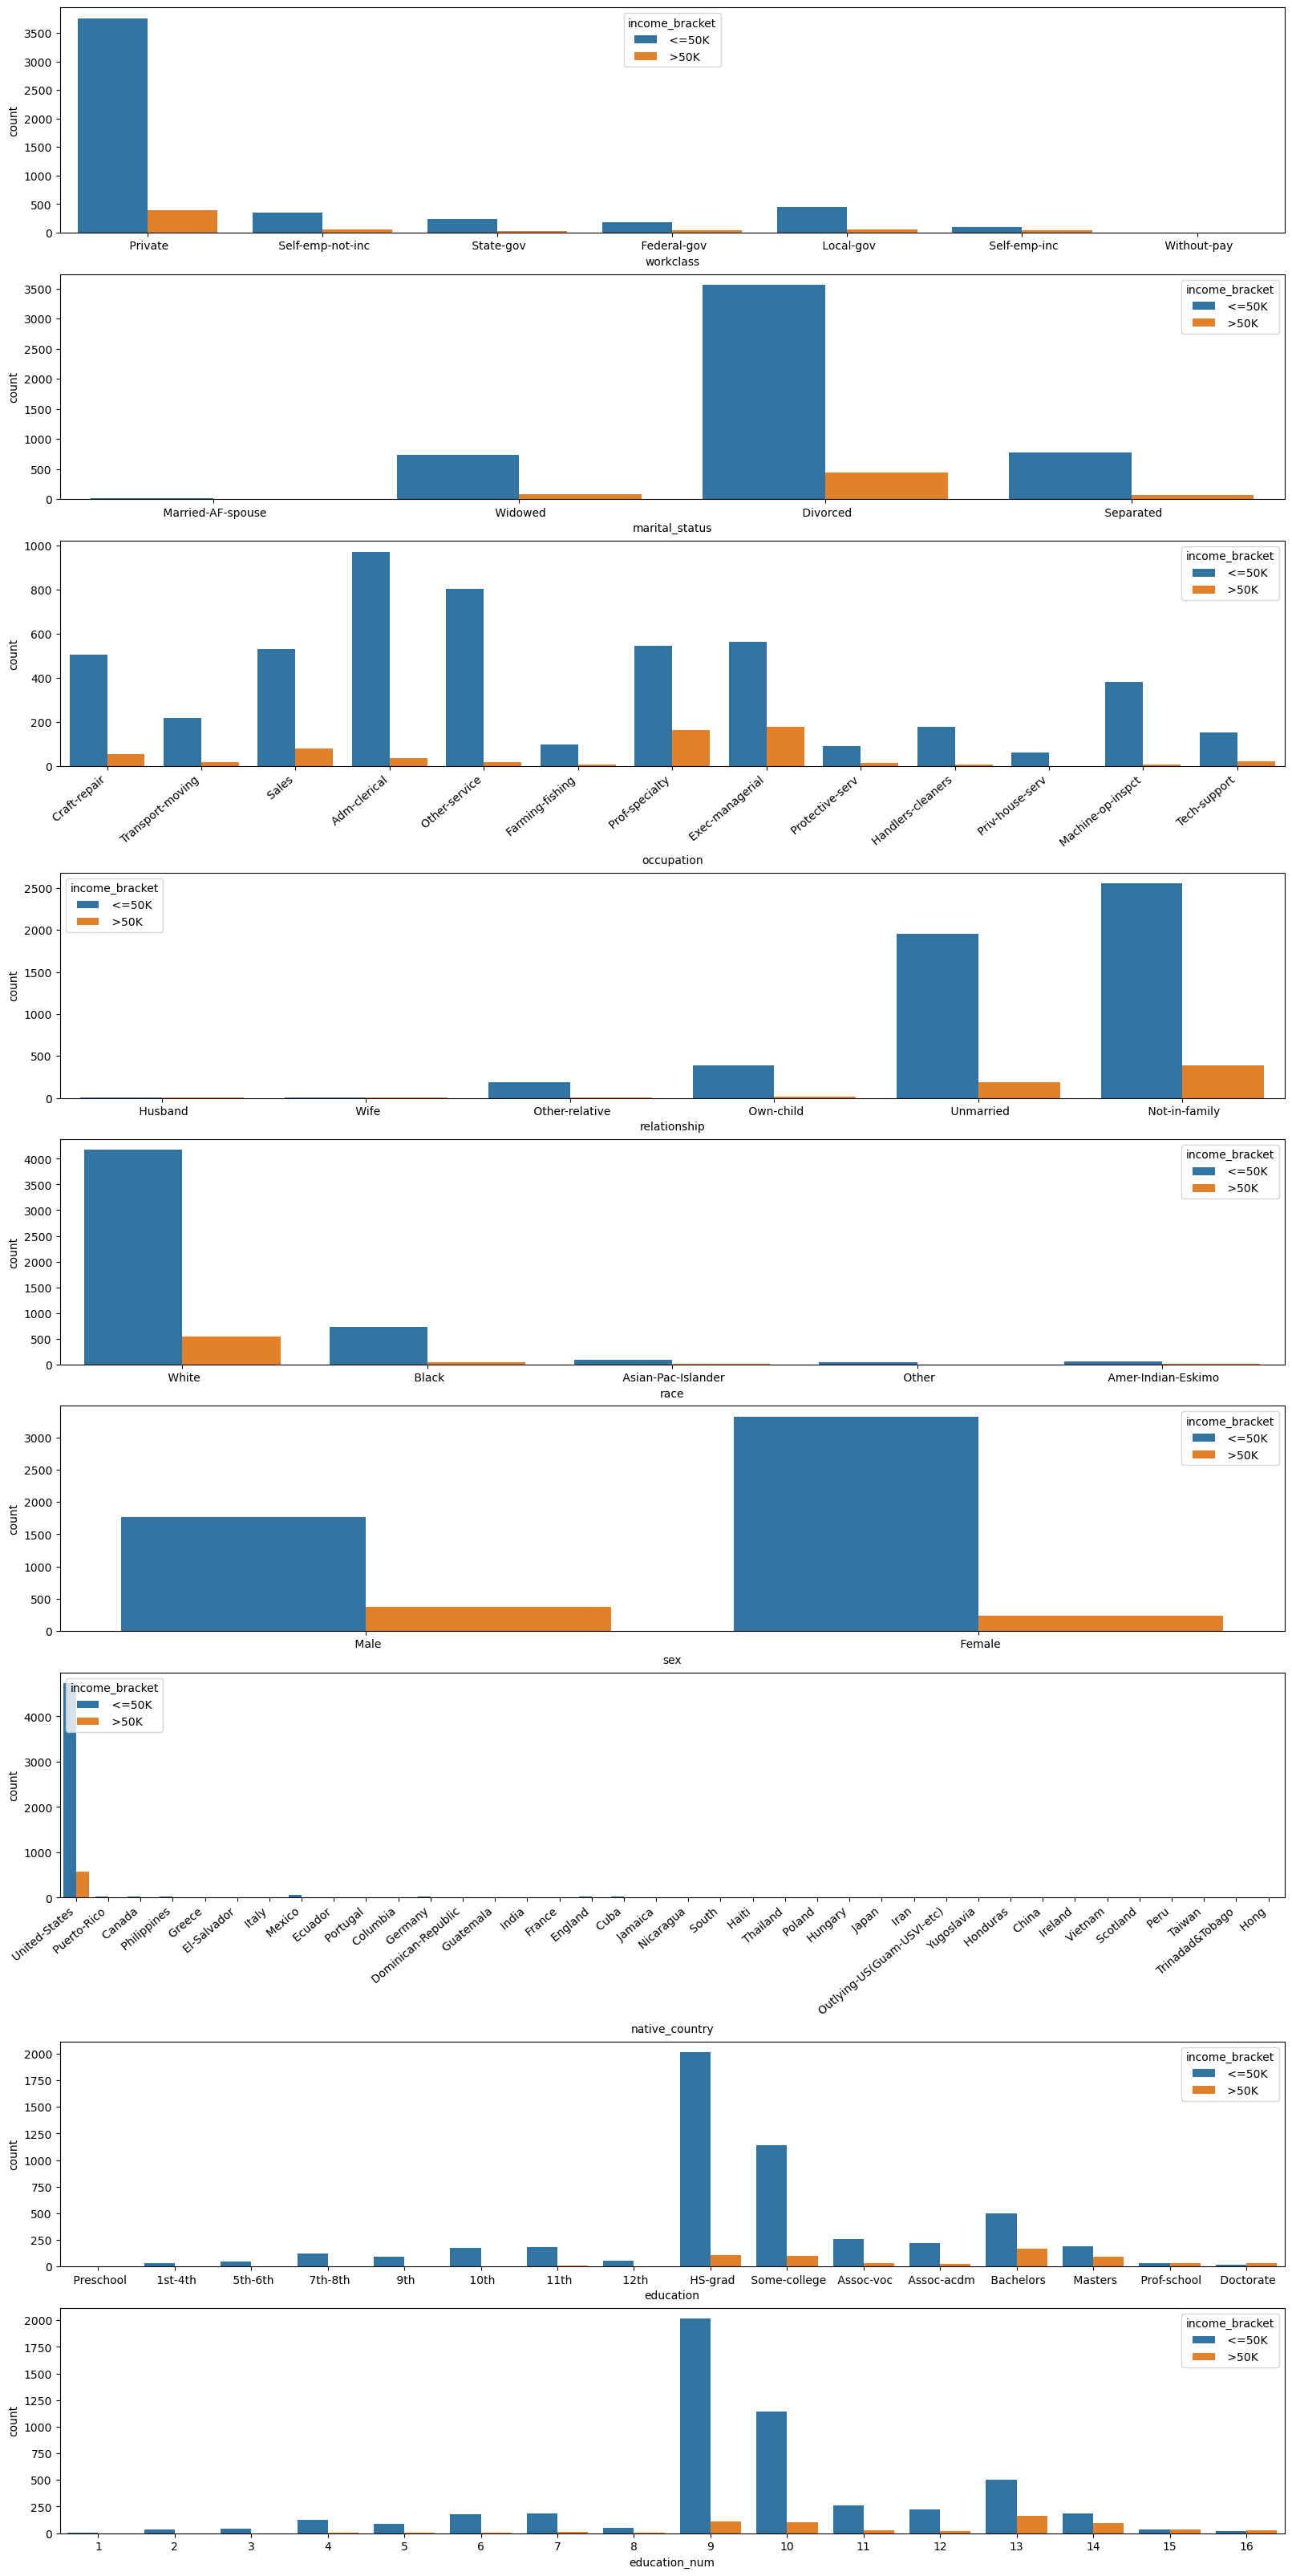

In [25]:
fig, axes = plt.subplots(nrows=9, ncols=1, figsize=(16,32), constrained_layout=True)
for index, column in enumerate(['workclass', 'marital_status', 'occupation', 
                                'relationship', 'race', 'sex', 'native_country', 
                                'education', 'education_num']):
    sns.countplot(data=data, x=column, hue="income_bracket", ax=axes[index])
    if column in ['occupation', 'native_country']:
        axes[index].set_xticklabels(axes[index].get_xticklabels(), rotation=40, ha="right")

del fig, axes, index, column

We can't see pattern in columns 'workclass', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'.

We can see pattern in column 'education'. The higher education (after Bachelors) people, has the higher chance to be included in the income_bracket of >50K. Also seen on education_num column here

## Data Preprocessing

Now we want to prepare our data for model training, which will include feature selection, transforming columns, and so on. This is a must to make our model best fit.

### Drop feature

In the EDA phase we know that capital_gain and capital_loss have so 0 value, now we want to take a closer look.

In [26]:
# Proportion of 0 values in capital loss
print('Proportion of 0 capital gain data is:', data.capital_gain.value_counts().head(1)[0]/data.capital_gain.value_counts().sum())


# Proportion of 0 values in capital loss
print('Proportion of 0 capital loss data is:', data.capital_loss.value_counts().head(1)[0]/data.capital_loss.value_counts().sum())


Proportion of 0 capital gain data is: 0.9327362135581314
Proportion of 0 capital loss data is: 0.9610115911485775


Here we see that values inside those columns are mostly zero, so it might be better if we drop these columns

In [27]:
data_new = data.drop(['capital_gain','capital_loss'], axis=1)

Now we make a new variable for our dataset which is data_new, so the raw data should be stayed intact.

### Feature Selection

We will select the feature that has the highest correlation with our target column using phik correlation.

#### Check Correlation

We want to see correaltion value of income bracket compared with other feature.

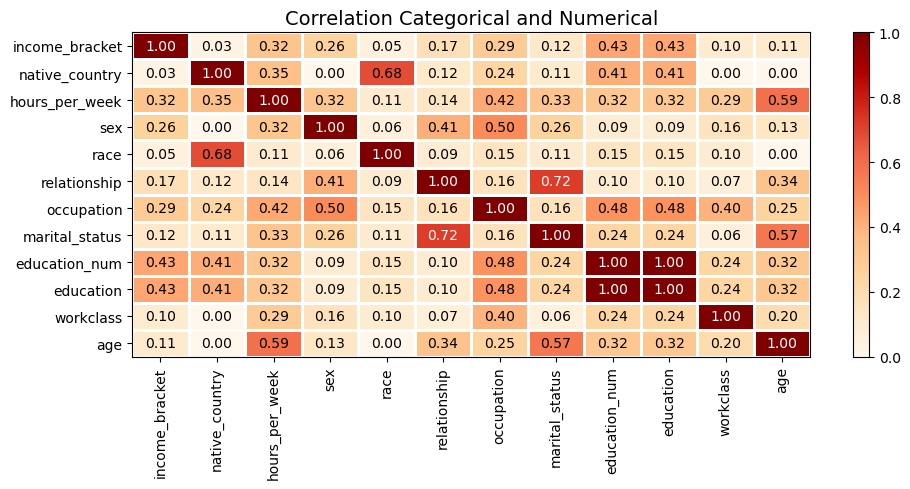

In [28]:
corr_p = data_new.phik_matrix(interval_cols='income_bracket')

plot_correlation_matrix(corr_p.values, 
                        x_labels=corr_p.columns, 
                        y_labels=corr_p.index, 
                        vmin=0, vmax=1, color_map="OrRd", 
                        title=r"Correlation Categorical and Numerical", 
                        figsize=(10,5))
plt.show()

del corr_p

Here we plot our correlation to help us understand more.

In [29]:
# We use phik correlation
phik_corr = data_new.phik_matrix().income_bracket
phik_corr.sort_values(ascending=False)

interval columns not set, guessing: ['age', 'hours_per_week']


income_bracket    1.000000
education         0.429934
education_num     0.429934
hours_per_week    0.321983
occupation        0.293222
sex               0.257240
relationship      0.174021
marital_status    0.121151
age               0.119867
workclass         0.098624
race              0.054342
native_country    0.031934
Name: income_bracket, dtype: float64

Here we have the result of correaltion of income bracket and all of the features inside our dataset. Now we want to drop some low correlation feature, which from my judgement should not be lower than 0.15.

So we will only include education, hours_per_week, occupation, sex, relationship to be our feature.

Here we don't use education_num because it has the same correlation with education, and we don't want that because from my assumption, both column has the same 'real' value with each other.

In [30]:
data_f = data_new[['education', 'hours_per_week', 'occupation', 'sex', 'relationship', 'income_bracket']]
data_f.head()

,education,hours_per_week,occupation,sex,relationship,income_bracket
0,HS-grad,40,Craft-repair,Male,Husband,>50K
1,HS-grad,90,Craft-repair,Male,Husband,<=50K
2,HS-grad,80,Transport-moving,Male,Husband,<=50K
3,HS-grad,55,Sales,Male,Husband,<=50K
4,HS-grad,60,Adm-clerical,Male,Husband,<=50K


Here is our filtered dataframe, which we filter by the highest correaltion with our target.

#### Cardinality Checking

We want to check if there are some cardinality issues with our data. If there is we will try to do cardinality reduction. Cardinality refers to the number of possible values that a feature can assume,  this means that there are too many unique labels inside a categorical column.

In [31]:
# Show unique labels
data_f.select_dtypes(exclude='number').nunique()

education         16
occupation        13
sex                2
relationship       6
income_bracket     2
dtype: int64

We know now that we have some collumns with high cardinality especially education, occupation, and relationship. We will try to fix this.

In [32]:
# Start from education column
data_f.education.value_counts()

 HS-grad         2124
 Some-college    1244
 Bachelors        668
 Assoc-voc        291
 Masters          282
 Assoc-acdm       245
 11th             194
 10th             179
 7th-8th          126
 9th               96
 Prof-school       66
 12th              55
 Doctorate         45
 5th-6th           44
 1st-4th           31
 Preschool          4
Name: education, dtype: int64

We want to reduce this into just 4 groups which are School, Bachelors, Vocation, Masters dan Doctorate

In [33]:
# Reduce Cardinality
data_f[['education']] = data_f[['education']].replace([' HS-grad',' 11th',' 10th',' 7th-8th',' 9th',' 12th',
                                               ' 5th-6th',' 1st-4th',' Preschool'], ' School')
data_f[['education']] = data_f[['education']].replace([' Some-college',' Bachelors'], ' Bachelors')
data_f[['education']] = data_f[['education']].replace([' Assoc-voc',' Assoc-acdm',' Prof-school'], ' Vocation')

In [34]:
# Check again
data_f.education.value_counts()

 School       2853
 Bachelors    1912
 Vocation      602
 Masters       282
 Doctorate      45
Name: education, dtype: int64

Here we have reduce its cardinality, now onto the next feature.

In [35]:
# We want to check on occupation column
data_f.occupation.value_counts()

 Adm-clerical         1008
 Other-service         819
 Exec-managerial       740
 Prof-specialty        710
 Sales                 608
 Craft-repair          560
 Machine-op-inspct     387
 Transport-moving      236
 Handlers-cleaners     182
 Tech-support          173
 Farming-fishing       105
 Protective-serv       105
 Priv-house-serv        61
Name: occupation, dtype: int64

We want to reduce the labels that might be fitted on to 'services' only.

In [36]:
data_f[['occupation']] = data_f[['occupation']].replace([' Craft-repair',' Other-service',' Protective-serv',
                                                 ' Handlers-cleaners', ' Priv-house-serv'], ' Service')

In [37]:
data_f.occupation.value_counts()

 Service              1727
 Adm-clerical         1008
 Exec-managerial       740
 Prof-specialty        710
 Sales                 608
 Machine-op-inspct     387
 Transport-moving      236
 Tech-support          173
 Farming-fishing       105
Name: occupation, dtype: int64

Here we slighly reduce the labels. Now, onto the last column.

In [38]:
data_f.relationship.value_counts()

 Not-in-family     2941
 Unmarried         2145
 Own-child          399
 Other-relative     190
 Wife                10
 Husband              9
Name: relationship, dtype: int64

Here we will group these label into 2, because from my asumption we can label these group into living alone or living together.

In [39]:
# Replacing
data_f[['relationship']] = data_f[['relationship']].replace([' Not-in-family',' Unmarried'], ' Living Alone')
data_f[['relationship']] = data_f[['relationship']].replace([' Own-child',' Other-relative', ' Wife', ' Husband'], ' Living Together')

In [40]:
# Check again
data_f.relationship.value_counts()

 Living Alone       5086
 Living Together     608
Name: relationship, dtype: int64

In [41]:
data_f['relationship'] = data_f['relationship'].astype('category')
data_f['sex'] = data_f['sex'].astype('category')

Now there are only two labels. We also want to change it to category data type which helps us to differentiate between ordinal and nominal data,

Next we want to show our new filtered data again.

In [42]:
# Reset index
data_f.reset_index(inplace=True, drop=True)
data_f.head()

,education,hours_per_week,occupation,sex,relationship,income_bracket
0,School,40,Service,Male,Living Together,>50K
1,School,90,Service,Male,Living Together,<=50K
2,School,80,Transport-moving,Male,Living Together,<=50K
3,School,55,Sales,Male,Living Together,<=50K
4,School,60,Adm-clerical,Male,Living Together,<=50K


### Data Split
 
We want to split our data, so seperate data for training and testing.

In [43]:
feature = ['education', 'hours_per_week', 'occupation', 'sex', 'relationship']
target = ['income_bracket']

In [44]:
# Feature and target split
X = data_f[feature]
y = data_f[target]

We define our feature column adn target column first

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=41)

print('Train Size : ', X_train.shape)
print('Test Size  : ', X_test.shape)


Train Size :  (4555, 5)
Test Size  :  (1139, 5)


Now we split into 4 data, also we use stratify to make sure the split between train set and test set each have equal propotion as the original y.

In [46]:
num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()
ord_cols = X_train.select_dtypes(include=['category']).columns.tolist()

print(f'Number of numerical columns: {len(num_cols)}')
print(f'Numerical columns: {num_cols}')
print(f'Number of categorical columns: {len(cat_cols)}')
print(f'Categorical columns: {cat_cols}')
print(f'Number of Ordinal columns: {len(ord_cols)}')
print(f'Ordinal columns: {ord_cols}')

X_train_num = X_train[num_cols]
X_train_cat = X_train[cat_cols]
X_train_ord = X_train[ord_cols]

X_test_num = X_test[num_cols]
X_test_cat = X_test[cat_cols]
X_test_ord = X_test[ord_cols]

Number of numerical columns: 1
Numerical columns: ['hours_per_week']
Number of categorical columns: 1
Categorical columns: ['occupation']
Number of Ordinal columns: 3
Ordinal columns: ['education', 'sex', 'relationship']


We also split data into 3 group to numerical, categorical, and ordinal. We use ordinal for 'education' because it has some kind of order list and the other two('sex', 'relationship') only have two labels so it might be better that we use ordinal, which will also helps us to encode this column.

### Handling Outlier

We previously check outlier on our numberical data, which we only use one after Feature selection phase. 

From our EDA, we know that:

hours_per_week Kurtosis: 3.7408961078451113

hours_per_week Skewness: 0.36488606799053

Columns 'hours_per_week' has a Normal Distribution

So we will use Capping methode to handle this outlier by using `winsorizer` library. We prefer to use this method because we don't want to trim and minimize our data.



In [47]:
winsoriser = Winsorizer(capping_method='gaussian', 
                          tail='both', 
                          fold=3,
                          variables=['hours_per_week'])

X_train_num_w = winsoriser.fit_transform(X_train_num)
X_test_num_w = winsoriser.transform(X_test_num)

In [48]:
# Tampilkan statistical desc masing2 dataset sebelum dan sesudah capping
print('X_train - Before Capping')
print(X_train_num.describe())
print('X_train - After Capping')
print(X_train_num_w.describe())
print('X_test - Before Capping')
print(X_test_num.describe())
print('X_test - After Capping')
print(X_test_num_w.describe())

X_train - Before Capping
       hours_per_week
count     4555.000000
mean        40.168606
std         11.110798
min          1.000000
25%         38.000000
50%         40.000000
75%         43.000000
max         99.000000
X_train - After Capping
       hours_per_week
count     4555.000000
mean        40.060588
std         10.625153
min          6.839872
25%         38.000000
50%         40.000000
75%         43.000000
max         73.497340
X_test - Before Capping
       hours_per_week
count     1139.000000
mean        40.515364
std         11.653329
min          2.000000
25%         38.000000
50%         40.000000
75%         45.000000
max         99.000000
X_test - After Capping
       hours_per_week
count     1139.000000
mean        40.389235
std         11.104974
min          6.839872
25%         38.000000
50%         40.000000
75%         45.000000
max         73.497340


We some minor changes by using this method, now onto the next step.

### Feature Encoding
We will use encoder to change category data into numerical, because our model can only process numerical data

Here we use OHE for cat_cols adn OrdinalEncoder for ord_col

In [49]:
# Define encoder
nom_enc = OneHotEncoder(sparse=False)
ord_enc = OrdinalEncoder()

Here we have defined both encoder we will use.

In [50]:
# Cat_col
X_train_cat_encoded_n = nom_enc.fit_transform(X_train_cat)
X_test_cat_encoded_n = nom_enc.transform(X_test_cat)

# Ord_col
X_train_cat_encoded_o = ord_enc.fit_transform(X_train_ord)
X_test_cat_encoded_o = ord_enc.transform(X_test_ord)

In [51]:
X_train_cat_df = pd.DataFrame(X_train_cat_encoded_n, columns=nom_enc.get_feature_names(cat_cols))
X_test_cat_df = pd.DataFrame(X_test_cat_encoded_n, columns=nom_enc.get_feature_names(cat_cols))

In [52]:
X_train_cat_df1 = pd.DataFrame(X_train_cat_encoded_o, columns=ord_cols)
X_test_cat_df1 = pd.DataFrame(X_test_cat_encoded_o, columns=ord_cols)

X_test_cat_df1

,education,sex,relationship
0,3.0,0.0,1.0
1,4.0,1.0,0.0
2,4.0,0.0,1.0
3,3.0,0.0,0.0
4,3.0,1.0,0.0
...,...,...,...
1134,2.0,1.0,0.0
1135,3.0,1.0,0.0
1136,3.0,1.0,0.0
1137,0.0,0.0,0.0


We finally encoded our train and test from both group.

### Feature Scaling

Now we want to normalise our data.

Based on the skewess in each numerical features above, athe data type is considered as normal distribution. The scaler that will be used in the scaling is a standard scaler

In [53]:
# Feature Scaling using Standard Scaler
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train_num_w)
X_test_num = scaler.transform(X_test_num_w)


In [54]:
X_train_num_df = pd.DataFrame(X_train_num, columns=num_cols)
X_test_num_df = pd.DataFrame(X_test_num, columns=num_cols)

Now we have scaled our data.

### Concat Feature Numberic and Categorial Columns
Now we want to merge the feature we have been encoded and scaled

In [55]:
X_train_final = pd.concat([X_train_num_df, X_train_cat_df,X_train_cat_df1], axis=1)
X_test_final = pd.concat([X_test_num_df, X_test_cat_df,X_test_cat_df1], axis=1)

X_train_final.head()

,hours_per_week,occupation_ Adm-clerical,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Machine-op-inspct,occupation_ Prof-specialty,occupation_ Sales,occupation_ Service,occupation_ Tech-support,occupation_ Transport-moving,education,sex,relationship
0,-0.005703,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
1,0.935563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,0.0
2,1.876830,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,1.0,0.0
3,-2.264742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,3.0,0.0,0.0
4,-0.005703,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0


In [56]:
X_test_final.head()

,hours_per_week,occupation_ Adm-clerical,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Machine-op-inspct,occupation_ Prof-specialty,occupation_ Sales,occupation_ Service,occupation_ Tech-support,occupation_ Transport-moving,education,sex,relationship
0,-0.005703,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,1.0
1,0.747310,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0,0.0
2,0.464930,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,1.0
3,-0.946969,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0
4,0.370804,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0


Now we have a full dataframe after feature enginering.

### Checking VIF

Now we have a encoded categorical data frame to numerical, we can calculate the VIF(Variance Inflation Factor), which is a measure if a column may contains the same information with another column.

Here we don't use a OHE encoded data because it may not be good to use.

In [57]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [58]:
calc_vif(X_train_final[['hours_per_week', 'education', 'sex', 'relationship']])

,variables,VIF
0,hours_per_week,1.053927
1,education,1.377902
2,sex,1.399080
3,relationship,1.103865


Here we see the value of VIF in our data. Since the the threshold is 5, so we can say that no feature we choose has a highly similiarity with each other. Now we will go ahead to Modeling our data.

## Model Definition

In this step, we will define the models we will be using are Logistic Regression and Support Vectore Machine according to the assignment. Several hyperparameters in the following model were also tried by trial and error to find the most optimal model.

In [59]:
# Define Logistic regression 
log_reg_model = LogisticRegression(C=12, penalty='l2', fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='multinomial')

In [60]:
# Define SVM kernel rbf and C=1000 
svm_model = SVC(kernel='rbf',C=1000)
     

## Model Training

Now we will fit the train data set into our model, this process is need to make the model learn about the data.


In [61]:
# Training using Linear Regression
log_reg_model.fit(X_train_final,y_train)

LogisticRegression(C=12, multi_class='multinomial')

In [62]:
# Training using SVM
svm_model.fit(X_train_final,y_train)

SVC(C=1000)

## Model Evaluation
Now we will evaluate our model using some of the metrics are commonly used in classification model.

### Logistic Regression Model

In [63]:
# Predict Logistic regression model
y_pred_train = log_reg_model.predict(X_train_final)
y_pred_test = log_reg_model.predict(X_test_final)

# Display Logistic Regression Accuracy
print('accuracy score train : ',accuracy_score(y_train,y_pred_train))
print('accuracy score test : ',accuracy_score(y_test,y_pred_test),'\n')

accuracy score train :  0.8952799121844127
accuracy score test :  0.8999122036874452 



In [64]:
# Display Logistic Regression Classification Report
print('classification report train : \n',classification_report(y_train,y_pred_train),'\n')
print('classification report test : \n',classification_report(y_test,y_pred_test))

classification report train : 
               precision    recall  f1-score   support

       <=50K       0.90      0.99      0.94      4072
        >50K       0.55      0.07      0.12       483

    accuracy                           0.90      4555
   macro avg       0.72      0.53      0.53      4555
weighted avg       0.86      0.90      0.86      4555
 

classification report test : 
               precision    recall  f1-score   support

       <=50K       0.91      0.99      0.95      1018
        >50K       0.64      0.13      0.22       121

    accuracy                           0.90      1139
   macro avg       0.77      0.56      0.58      1139
weighted avg       0.88      0.90      0.87      1139



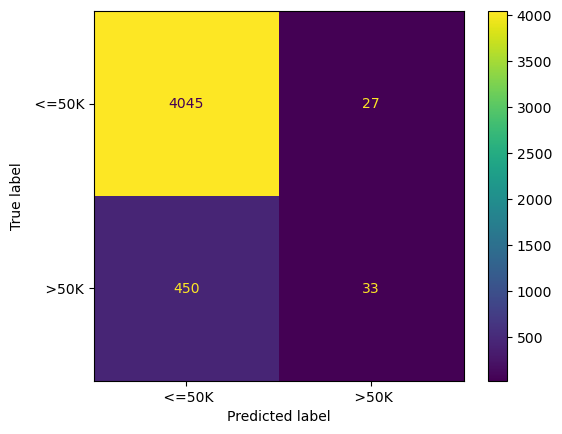

In [65]:
# Display Logistic Regression Confusion matrix - Train

cm_log_reg_train = confusion_matrix(y_train, y_pred_train, labels=log_reg_model.classes_)
displog_reg_train = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_train,display_labels=log_reg_model.classes_)

displog_reg_train.plot()
plt.show()

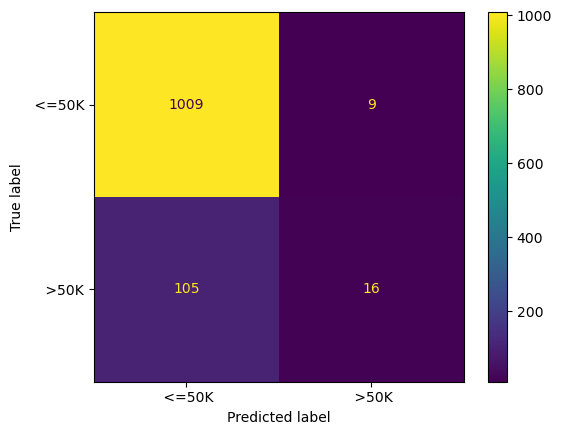

In [66]:
# Display Logistic Regression Confusion matrix - Test

cm_log_reg_test = confusion_matrix(y_test, y_pred_test, labels=log_reg_model.classes_)
disp_log_reg_test = ConfusionMatrixDisplay(confusion_matrix=cm_log_reg_test,display_labels=log_reg_model.classes_)

disp_log_reg_test.plot()
plt.show()

### SVM Model

In [67]:
# Predict SVM model
y_pred_train_svm = svm_model.predict(X_train_final)
y_pred_test_svm = svm_model.predict(X_test_final)

# Display SVM accuracy
print('accuracy score train : ',accuracy_score(y_train, y_pred_train_svm))
print('accuracy score test : ',accuracy_score(y_test, y_pred_test_svm),'\n')

accuracy score train :  0.9104281009879254
accuracy score test :  0.9007901668129938 



In [68]:
# Display SVM Classification Report
print('classification report train : \n', classification_report(y_train, y_pred_train_svm),'\n')
print('classification report test : \n', classification_report(y_test, y_pred_test_svm))

classification report train : 
               precision    recall  f1-score   support

       <=50K       0.91      0.99      0.95      4072
        >50K       0.78      0.22      0.34       483

    accuracy                           0.91      4555
   macro avg       0.85      0.61      0.65      4555
weighted avg       0.90      0.91      0.89      4555
 

classification report test : 
               precision    recall  f1-score   support

       <=50K       0.91      0.99      0.95      1018
        >50K       0.63      0.16      0.25       121

    accuracy                           0.90      1139
   macro avg       0.77      0.57      0.60      1139
weighted avg       0.88      0.90      0.87      1139



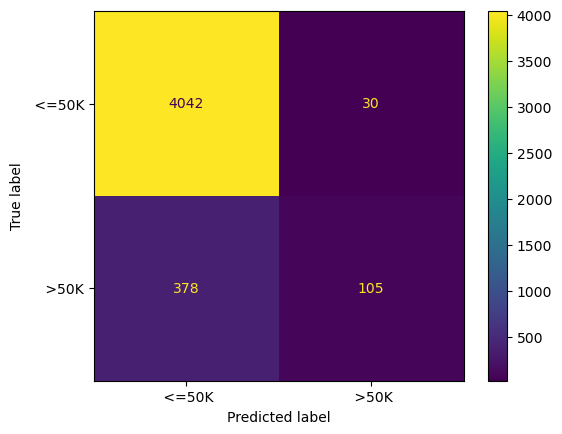

In [69]:
# Display SVM Confusion matrix - Train

cm_svm_train = confusion_matrix(y_train, y_pred_train_svm, labels=svm_model.classes_)
disp_svm_train = ConfusionMatrixDisplay(confusion_matrix=cm_svm_train,display_labels=svm_model.classes_)

disp_svm_train.plot()
plt.show()

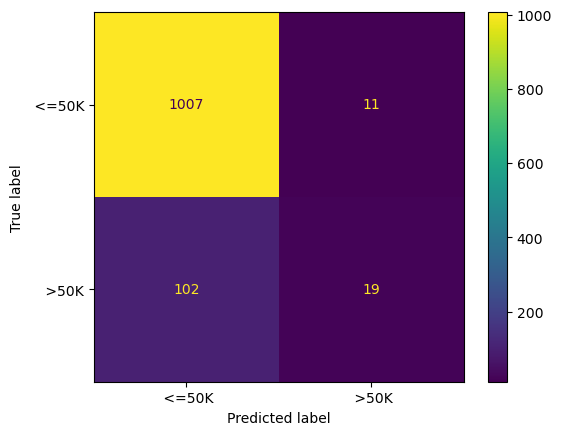

In [70]:
# Display SVM Confusion matrix - Test

cm_svm_test = confusion_matrix(y_test, y_pred_test_svm, labels=svm_model.classes_)
disp_svm_test = ConfusionMatrixDisplay(confusion_matrix=cm_svm_test,display_labels=svm_model.classes_)

disp_svm_test.plot()
plt.show()

* From our result using SVM we can see that based on this result we can say that our model is accuire a good accuracy which is 90%, but when we look at the result we also know that our data is imbalanced, so if we only use accuracy it will result in a misleading interpretation of results.

* This Model is slightly superior than the last one, because the recall and precision points are higher. Also f1-score are slightly better.

* But if we look at macro avg recall points, if compared to logistic regression it doesn't improve much. We got 0.61 on train data and 0.57 on test data, which is lower than previous model.

* Looking at this result, using SVM model might give us better prediction than using logistic regression

## Model Analysis

`Logistic Regression`

* Here finally make our evaluation about the first model which is Logistic Regression. Based on this result we can say that our model is accuire a good accuracy which is 90%, but when we look at the result we also know that our data is imbalanced, so if we only use accuracy it will result in a misleading interpretation of results.

* Our recall point is so low 0.13, which is not good because it shows that we might predict so many things wrong.

* We can use macro avg for recall, because in this case there is no need to prioritize one class than another. In our result here we can see the recall is 0.56 in the test result, so we can say using this model we can predict almost 60% it will correctly predict to be positive.

* Using macro avg for f1-score, which examine both precision and recall of our model. This is a more balanced summarization of our model performance. In this model we have 0.58, which closer to 60%.

* We can say that, if we are using this model to predict our result, it might not be the best model to use, because we might predict so many things wrong.

`SVM`
* From our result using SVM we can see that based on this result we can say that our model is accuire a good accuracy which is 90%, but when we look at the result we also know that our data is imbalanced, so if we only use accuracy it will result in a misleading interpretation of results.

* This Model is slightly superior than the last one, because the recall and precision points are higher. Also f1-score are slightly better.

* But if we look at macro avg recall points, if compared to logistic regression it doesn't improve much. We got 0.61 on train data and 0.57 on test data, which is lower than previous model.

* Looking at this result, using SVM model might give us better prediction than using logistic regression. Although, we can also say that using this model we still might predict so many things wrong.

`Future Improvement`
* We need to use more feature such as `income gain` if we have more data about it, because from our EDA this column might have a high correaltion with our target. But since it has so many zero value, we decided to drop and not to use it.

* Using Hyperparameter tuning, not by manually try and change the paramaters might also help us to raise our result.

* Handling with imbalanced data is needed, because our result might be so misleading if we only consider accuracy score.

## Overall Analysis & Conclusion

From previous EDA, we know that:

* There are only 2 class on this target, the first one is income_bracker '>50K' and the second is '<=50K'.
* We know that our target data is imbalanced, with <=50K income bracket is more bigger.
* We already use `stratify=y` in our train_test_split to combat this, but it need more than that apperently.
* We can see that we have outliers in all our numerical data and also some skewed data distribution in capital_gain and capital_loss column.
* On capital_gain and capital_loss column are mostly zero, so decided we drop these columns.
* We know that we have some collumns with high cardinality especially education, occupation, and relationship.
* When checking VIF, we can say that no feature we choose has a highly similiarity with each other.

Building our model, we can say that:

* We use two model in this assignment, logistic regression and svm.
* On logistic regression we use parameters which we tried manually, the paramter we use = (C=12, penalty='l2', fit_intercept=True, solver='lbfgs', max_iter=100, multi_class='multinomial').
On SVM model we use these parameters = (kernel='rbf',C=1000)
* From our result, we know that both our model are not doing great, because it predicts so many things wrong.


### Conceptual Problems
Jawab pertanyaan berikut:

1. Apakah yang dimaksud dengan coeficient pada logistic regression?

It is like Regression in general, logistic regression has a coefficient and an intercept. Based on logistic model from our current case:

In [85]:
log_reg_model.coef_

array([[ 0.24065823, -0.16362299,  0.61684801, -0.33854162, -0.92248231,
         0.6912263 ,  0.27595157, -0.20643029,  0.35435318, -0.30703901,
        -0.04754111,  0.54292822, -0.34307816]])

In [86]:
log_reg_model.intercept_

array([-1.44902685])

We know that logistic regression has this formula:

<img src = https://quantifyinghealth.com/wp-content/uploads/2021/05/Logistic-regression-equation.png>

In this case we predict if someonce considered be on income bracket that is less or equal than 50K or more than 50K based on our data. Using this formula 

<p> P : probability of having the outcome
<p> P / (1-P) : odds of the outcome.

So, from those log(P/1-p) we can get the target or y value because our y value is replaced by those probability log equation. In this case our answer is in the form binary (0 or 1) because probability range is no less than 0 and no more than 1. Our classification is either its less or equal than 50K or more than 50K. 

We can say that coeficient in the logistic regression will showed the probaility where the data will change its class. If we calculate intercept and other coefficitent we will get those log(P/1-p) result to determined the probability for each individual. At the end we must obtain those P (Probability).

2. Apakah yang dimaksud dengan Support Vector pada SVM?

Hyperplane is margin between support vector divided by 2, where SVM use the best hyperplane by maximizing the distance between classes. This means that the support vector is a tangent to the hyperplane in each class.
They are also called vectors instead of points because they have as many elements as there are dimensions to input space. 

So we can say that Support vectors are the points that define the maximum margin of separation of the hyperplane that separates the classes.

3. Apakah fungsi parameter kernel pada SVM? Jelaskan salah satu kernel yang kalian pahami!

Kernel is a mathematic function used in SVM for helping to solve problems. They provide shortcuts to avoid complex calculations. For example, a linear kernel will generate a linear hyperplane solution for classifying each label. Conversely, the radial kernel will transform the data into a larger dimension, so that the classification problem can be solved. 

Radial Basic Function (RBF). Kernel RBF is a kernel function used when data cannot be separated linearly. This kernel is the most common form of kernelization and is one of the most widely used kernels due to its similarity to the Gaussian distribution. RBF can also create more complex models as decision boundaries so that data sets can be classified more accurately.

## Model Saving

Now we want to save our model that we build and try to test it on a new data, to see its perfonmance.

In [84]:
with open('model_log_reg.pkl', 'wb') as file_1:
  joblib.dump(log_reg_model, file_1)

with open('model_svm.pkl', 'wb') as file_2:
  joblib.dump(svm_model, file_2)

with open('model_scaler.pkl', 'wb') as file_3:
  joblib.dump(scaler, file_3)

with open('model_nom_encoder.pkl', 'wb') as file_4:
  joblib.dump(nom_enc, file_4)

with open('model_ord_encoder.pkl', 'wb') as file_5:
  joblib.dump(ord_enc, file_5)

with open('list_num_cols.pkl', 'wb') as file_6:
  joblib.dump(num_cols, file_6)

with open('list_cat_cols.pkl', 'wb') as file_7:
  joblib.dump(cat_cols, file_7)

with open('list_ord_cols.pkl', 'wb') as file_8:
  joblib.dump(ord_cols, file_8)